#**Dehazing with CycleGAN on Reside Dataset(trans-clear)**

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2334, done.
remote: Total 2334 (delta 0), reused 0 (delta 0), pack-reused 2334
Receiving objects: 100% (2334/2334), 8.09 MiB | 10.86 MiB/s, done.
Resolving deltas: 100% (1497/1497), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 18.8MB/s 
     |████████████████████████████████| 204kB 23.9MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655251 sha256=b584d5813c721bd1f2c5e438f38b53691bd1033062ecfcfa39a9b562d0d24765
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5711 sha256=fd404f2b0f18abf530c228d75252d4dd6e771c59dbb6bf5d853a07b84a17f2aa
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


In [ ]:
!ls /mydrive/Dehazing/
!cp /mydrive/Dehazing/reside_cyclegan_trans.zip ../
!unzip -q ../reside_cyclegan_trans.zip -d dataset/

reside_cyclegan_trans.zip  reside_pix2pix.zip  results_trans.zip
reside_pix2pix_trans.zip   results_hazy.zip


# Training


In [ ]:
!python train.py --dataroot ./dataset/ --name dehazing_cycleGAN --model cycle_gan --n_epochs 50 --n_epochs_decay 50

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./dataset/                    	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

# Testing


In [ ]:
!cp ./checkpoints/dehazing_cycleGAN/latest_net_G_A.pth ./checkpoints/dehazing_cycleGAN/latest_net_G.pth

In [ ]:
!zip -r ./trained_cyclegan_trans.zip ./checkpoints/dehazing_cycleGAN/latest_net_G.pth
!cp ./trained_cyclegan_trans.zip /mydrive/Dehazing/
from google.colab import files
files.download('trained_cyclegan_trans.zip')

  adding: checkpoints/dehazing_cycleGAN/latest_net_G.pth (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python test.py --dataroot dataset/testA --name dehazing_cycleGAN --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: dataset/testA                 	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [ ]:
!zip -r results_cyclegan_trans.zip ./results/dehazing_cycleGAN/test_latest/images/
!cp ./results_cyclegan_trans.zip /mydrive/Dehazing/
from google.colab import files
files.download('results_cyclegan_trans.zip')

  adding: results/dehazing_cycleGAN/test_latest/images/ (stored 0%)
  adding: results/dehazing_cycleGAN/test_latest/images/00007_real.png (stored 0%)
  adding: results/dehazing_cycleGAN/test_latest/images/00037_fake.png (deflated 0%)
  adding: results/dehazing_cycleGAN/test_latest/images/00008_real.png (stored 0%)
  adding: results/dehazing_cycleGAN/test_latest/images/00015_fake.png (deflated 0%)
  adding: results/dehazing_cycleGAN/test_latest/images/00007_fake.png (deflated 0%)
  adding: results/dehazing_cycleGAN/test_latest/images/00046_real.png (stored 0%)
  adding: results/dehazing_cycleGAN/test_latest/images/00023_real.png (stored 0%)
  adding: results/dehazing_cycleGAN/test_latest/images/00026_real.png (stored 0%)
  adding: results/dehazing_cycleGAN/test_latest/images/00031_real.png (stored 0%)
  adding: results/dehazing_cycleGAN/test_latest/images/00031_fake.png (deflated 0%)
  adding: results/dehazing_cycleGAN/test_latest/images/00025_fake.png (deflated 0%)
  adding: results/de

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualize

In [ ]:
!ls ./results/dehazing_cycleGAN/test_latest/images

00000_fake.png	00010_fake.png	00020_fake.png	00030_fake.png	00040_fake.png
00000_real.png	00010_real.png	00020_real.png	00030_real.png	00040_real.png
00001_fake.png	00011_fake.png	00021_fake.png	00031_fake.png	00041_fake.png
00001_real.png	00011_real.png	00021_real.png	00031_real.png	00041_real.png
00002_fake.png	00012_fake.png	00022_fake.png	00032_fake.png	00042_fake.png
00002_real.png	00012_real.png	00022_real.png	00032_real.png	00042_real.png
00003_fake.png	00013_fake.png	00023_fake.png	00033_fake.png	00043_fake.png
00003_real.png	00013_real.png	00023_real.png	00033_real.png	00043_real.png
00004_fake.png	00014_fake.png	00024_fake.png	00034_fake.png	00044_fake.png
00004_real.png	00014_real.png	00024_real.png	00034_real.png	00044_real.png
00005_fake.png	00015_fake.png	00025_fake.png	00035_fake.png	00045_fake.png
00005_real.png	00015_real.png	00025_real.png	00035_real.png	00045_real.png
00006_fake.png	00016_fake.png	00026_fake.png	00036_fake.png	00046_fake.png
00006_real.png	00016_real

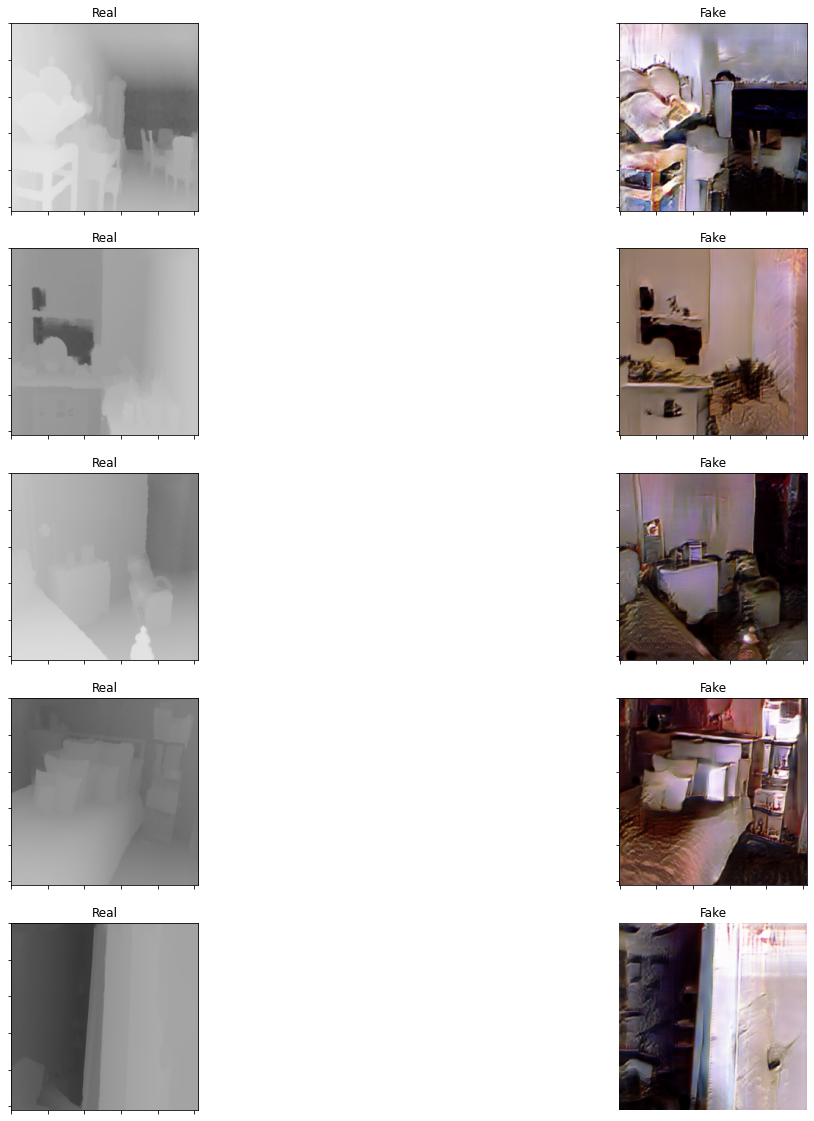

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 5
num=5
p=0
add = ['_real.png','_fake.png']
title = ['Real','Fake']
for i in range(1, columns*rows +1):
    img = plt.imread('./results/dehazing_cycleGAN/test_latest/images/0000' + str(num) + add[p])
    a = fig.add_subplot(rows, columns, i)
    a.set_title(title[p])
    a.set_xticklabels([])
    a.set_yticklabels([])
    plt.imshow(img)
    p+=1;
    if(p==2):
      num+=1
      p=0
plt.axis('off')
plt.show()